In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [5]:
# Exploratory Data Analysis

In [6]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [8]:
sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [11]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [12]:
test.describe()

,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [13]:
profile_train = ProfileReport(train, title="Ydata Profiling Report")
profile_test = ProfileReport(train, title="Ydata Profiling Report")

In [14]:
profile_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile_test

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
train.shape, test.shape

((15819, 3), (10546, 2))

In [17]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

array([<Axes: ylabel='message'>], dtype=object)

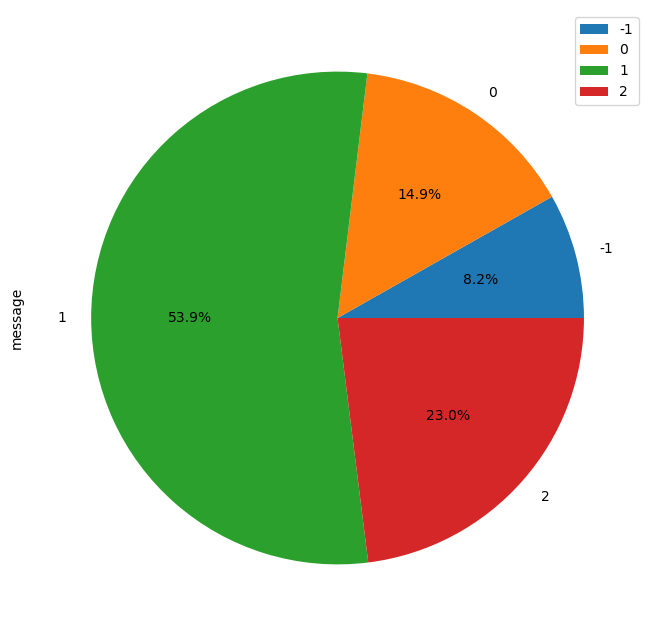

In [18]:
sum_df = train[['sentiment', 'message']].groupby('sentiment').count()
sum_df.plot(kind='pie', subplots=True, autopct='%1.1f%%',figsize=(8,8))

In [19]:
!pip install pycaret

In [20]:
from pycaret.datasets import get_data

In [21]:
data = train = pd.read_csv("train.csv")

In [22]:
from pycaret.regression import *
reg_setup = setup(data, target ='sentiment', session_id=123)

,Description,Value
0,Session id,123
1,Target,sentiment
2,Target type,Regression
3,Original data shape,"(15819, 3)"
4,Transformed data shape,"(15819, 3)"
5,Transformed train set shape,"(11073, 3)"
6,Transformed test set shape,"(4746, 3)"
7,Numeric features,1
8,Categorical features,1
9,Preprocess,True


In [23]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5609,0.6715,0.8190,0.0433,0.3272,0.3645,0.4250
rf,Random Forest Regressor,0.5191,0.6733,0.8201,0.0408,0.3235,0.3128,0.3960
gbr,Gradient Boosting Regressor,0.5191,0.6733,0.8201,0.0408,0.3235,0.3129,0.3890
catboost,CatBoost Regressor,0.5192,0.6734,0.8201,0.0408,0.3235,0.3129,0.4660
xgboost,Extreme Gradient Boosting,0.5191,0.6733,0.8201,0.0408,0.3235,0.3128,0.4400
dt,Decision Tree Regressor,0.5191,0.6733,0.8201,0.0408,0.3235,0.3128,0.3810
lightgbm,Light Gradient Boosting Machine,0.5201,0.6735,0.8202,0.0406,0.3237,0.3135,0.3930
ada,AdaBoost Regressor,0.5223,0.6745,0.8209,0.0390,0.3242,0.3157,0.3860
ridge,Ridge Regression,0.5953,0.6911,0.8310,0.0151,0.3328,0.4014,0.4510
lar,Least Angle Regression,0.5957,0.6917,0.8313,0.0142,0.3329,0.4018,0.4630


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [24]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [25]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [26]:
exp.setup(data, target = 'sentiment', session_id = 123)

,Description,Value
0,Session id,123
1,Target,sentiment
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2, 2: 3"
4,Original data shape,"(15819, 3)"
5,Transformed data shape,"(15819, 3)"
6,Transformed train set shape,"(11073, 3)"
7,Transformed test set shape,"(4746, 3)"
8,Numeric features,1
9,Categorical features,1


In [27]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5598,0.5225,0.5598,0.7518,0.4223,0.0611,0.1767,0.4580
gbc,Gradient Boosting Classifier,0.5598,0.5171,0.5598,0.7518,0.4223,0.0611,0.1767,0.4670
xgboost,Extreme Gradient Boosting,0.5598,0.4964,0.5598,0.7518,0.4223,0.0611,0.1767,0.4360
catboost,CatBoost Classifier,0.5598,0.4773,0.5598,0.7518,0.4223,0.0611,0.1767,0.4110
lightgbm,Light Gradient Boosting Machine,0.5597,0.5556,0.5597,0.7504,0.4221,0.0610,0.1763,0.4230
et,Extra Trees Classifier,0.5591,0.5620,0.5591,0.7420,0.4209,0.0596,0.1725,0.4870
rf,Random Forest Classifier,0.5589,0.5213,0.5589,0.7386,0.4206,0.0593,0.1713,0.4620
qda,Quadratic Discriminant Analysis,0.5559,0.5335,0.5559,0.7194,0.4147,0.0536,0.1551,0.5010
lda,Linear Discriminant Analysis,0.5551,0.5193,0.5551,0.7096,0.4165,0.0529,0.1516,0.4500
ada,Ada Boost Classifier,0.5542,0.5247,0.5542,0.6112,0.4113,0.0484,0.1393,0.4480


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [28]:
y = train['sentiment']
X = train['message']

In [29]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

In [30]:
model_dict = {'Linear SVC' : LinearSVC(random_state=3),
             'Logistic' : LogisticRegression(random_state=3, solver='liblinear'),
             'Random Forest' : RandomForestClassifier(random_state=3),
             'AdaBoost' : AdaBoostClassifier(random_state=3),
             'Multinomial Naive Bayes' : MultinomialNB(),
             'Decision Tree Classifier' : DecisionTreeClassifier(),
             'KNeighborsClassifier' : KNeighborsClassifier()}    

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

def model_score_df(model_dict):    
    model_name, p_score_list, r_score_list, f1_score_list = [], [], [], []
    for k,v in model_dict.items():
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
    model_comparison_df = pd.DataFrame([model_name, p_score_list, r_score_list, f1_score_list]).T
    model_comparison_df.columns = ['model_name', 'precision_score', 'recall_score', 'f1_score']
    model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

In [33]:
model_score_df(model_dict)

,model_name,precision_score,recall_score,f1_score
0,Linear SVC,0.704209,0.616105,0.648371
6,KNeighborsClassifier,0.583608,0.563183,0.571122
1,Logistic,0.796514,0.519294,0.565142
2,Random Forest,0.748609,0.502818,0.551216
3,AdaBoost,0.635224,0.480322,0.520163
5,Decision Tree Classifier,0.529772,0.498015,0.510455
4,Multinomial Naive Bayes,0.841269,0.430447,0.454731


In [34]:
# Training my model

In [35]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_test)
print(classification_report(y_test, lsvc_pred))

              precision    recall  f1-score   support

          -1       0.72      0.47      0.57       389
           0       0.58      0.40      0.47       706
           1       0.75      0.87      0.81      2559
           2       0.77      0.72      0.74      1092

    accuracy                           0.73      4746
   macro avg       0.70      0.62      0.65      4746
weighted avg       0.73      0.73      0.72      4746



In [36]:
f1_score(y_test, lsvc_pred, average="macro")

0.648370541700318

In [37]:
# Hyperparameter tuning

In [38]:
lsvc = LinearSVC()

In [39]:
param_grid = {'C': [0.001, 0.01, 0.5, 1, 5, 10, 50, 100, 1000]}

In [40]:
grid = GridSearchCV(
    estimator=LinearSVC(),
    param_grid = param_grid,
    scoring='f1_macro',
    cv=5)

In [41]:
grid.fit(X_vectorized, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.5, 1, 5, 10, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [42]:
grid.best_params_

{'C': 1}

In [43]:
y_pred = grid.predict(X_test)

In [44]:
f1_score(y_test, y_pred, average="macro")

0.9794088156567061

In [45]:
# Creating an output csv for submission

In [46]:
lsvc = LinearSVC()

grid = GridSearchCV(
    estimator=LinearSVC(),
    param_grid = param_grid,
    scoring='f1_macro',
    cv=5)

grid.fit(X_vectorized, y)

best_svc = grid.best_estimator_

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.97      0.99       389
           0       0.98      0.94      0.96       706
           1       0.98      0.99      0.99      2559
           2       0.98      0.98      0.98      1092

    accuracy                           0.98      4746
   macro avg       0.99      0.97      0.98      4746
weighted avg       0.98      0.98      0.98      4746



In [47]:
f1_score(y_test, y_pred, average="macro")

0.9794088156567061

In [48]:
testx = test['message']
test_vect = vectorizer.transform(testx)

In [50]:
y_pred = grid.predict(test_vect)

In [51]:
test['sentiment'] = y_pred

In [52]:
test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


In [53]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)